<a href="https://colab.research.google.com/github/jcfarese/MLA_JCF/blob/main/MLA5_JCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Jim Farese**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 1. Imports for Specific Models


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report



## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [36]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')


# Problem 1

### 1. Acquire Data

Load the landsat_train.csv into a data frame named landsat_train and the landsat_test.csv into a dataframe named landsat_test.

In [5]:
#Landsat_train
landsat_train = pd.read_csv('/content/gdrive/MyDrive/School/Machine Learning/MLA5_JCF/landsat_train.csv')
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [6]:
#Landsat_test
landsat_test = pd.read_csv('/content/gdrive/MyDrive/School/Machine Learning/MLA5_JCF/landsat_test.csv')
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


### 2. Statistical and Visual Exploration

Create bar plots to display the number of land types for landsat_train and landsat_test (two different plots).

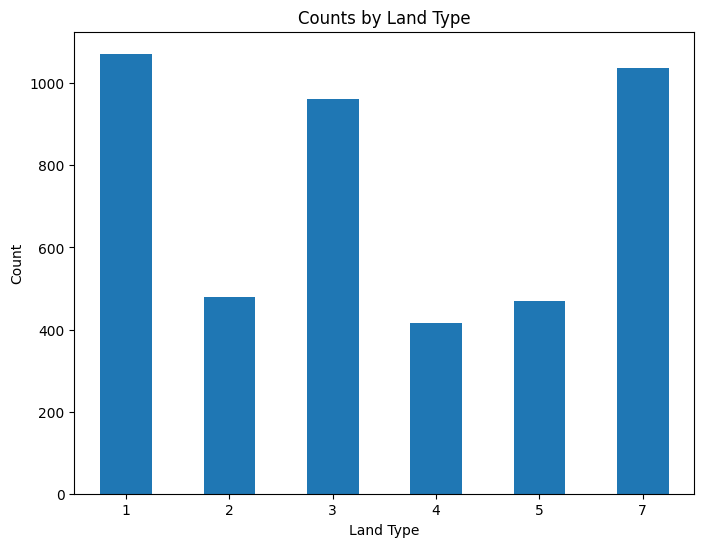

In [12]:
#Create barplots to display number of land types for train
train_land_type_counts = landsat_train['land_type'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
train_land_type_counts.plot(kind='bar')

# Rotate x-axis labels and add labels if needed
plt.xticks(rotation=0)  # Set rotation to 0 for horizontal labels
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.title('Counts by Land Type')

plt.show()

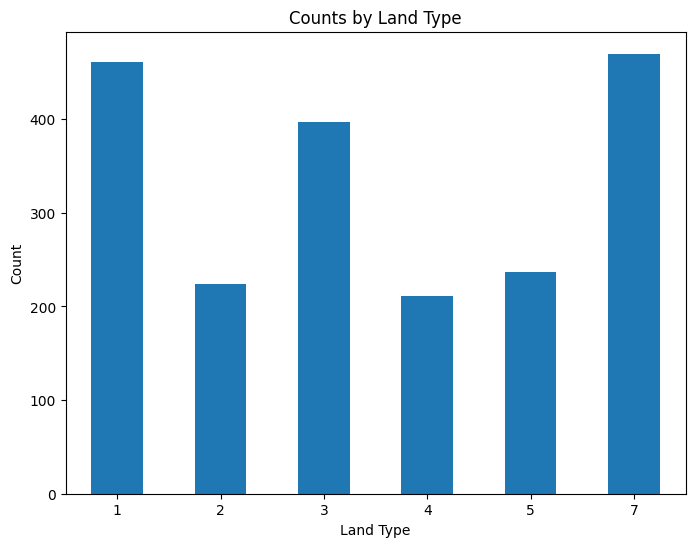

In [11]:
#Create barplot to display number of land types for test
test_land_type_counts = landsat_test['land_type'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
test_land_type_counts.plot(kind='bar')

# Rotate x-axis labels and add labels if needed
plt.xticks(rotation=0)  # Set rotation to 0 for horizontal labels
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.title('Counts by Land Type')

plt.show()

### 3. Splitting Data into Train/Test

Create a data frame called X_train with all columns from landsat_train except for land_type.

In [13]:
#Create data called X_train
X_train = landsat_train.drop('land_type', axis=1)
X_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


Create a data frame called X_test with all columns from landsat_test except for land_type.

In [14]:
#Create data called X_test
X_test = landsat_test.drop('land_type', axis=1)
X_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,80,102,102,79,76,102,102,79,76,102,...,109,87,79,107,109,87,79,107,113,87
1,76,102,102,79,76,102,106,83,76,102,...,109,87,79,107,113,87,79,103,104,83
2,80,98,106,79,76,94,102,76,76,94,...,104,79,79,95,100,79,79,95,96,75
3,76,94,102,76,76,94,102,76,76,94,...,100,79,79,95,96,75,79,95,100,75
4,76,94,102,76,76,94,102,76,76,89,...,96,75,79,95,100,75,75,95,100,79


Create a data frame called y_train with the land_type column from landsat_train.


In [15]:
#Create y_train
y_train = landsat_train['land_type']
y_train.head()

,land_type
0,3
1,3
2,3
3,3
4,3


Create a data frame called y_test with the land_type column from landsat_test.

In [16]:
#Create y_test
y_test = landsat_test['land_type']
y_test.head()

,land_type
0,3
1,3
2,4
3,4
4,4


### 4. Building the Pipeline

Create a column transformer that will MinMax scale the numerical variables


In [20]:
#Create column transformer
numerical_features = X_train.select_dtypes(include=['number']).columns

preprocessor= ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])

Create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.

In [19]:
#Create a pipeline and perform RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### 5. Executing the Model

Run the pipeline to fit the RandomForestClassification model.

In [21]:
#Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### 6. Evaluating The Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.


In [22]:
#Predict y values
y_pred = pipeline.predict(X_test)
y_pred

array([3, 3, 3, ..., 5, 5, 5])

Use the classification_function to display the precision, recall, and F1 score for each class.


In [23]:
#Create a Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       461
           2       0.97      0.97      0.97       224
           3       0.89      0.95      0.92       397
           4       0.77      0.63      0.69       211
           5       0.93      0.90      0.91       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.

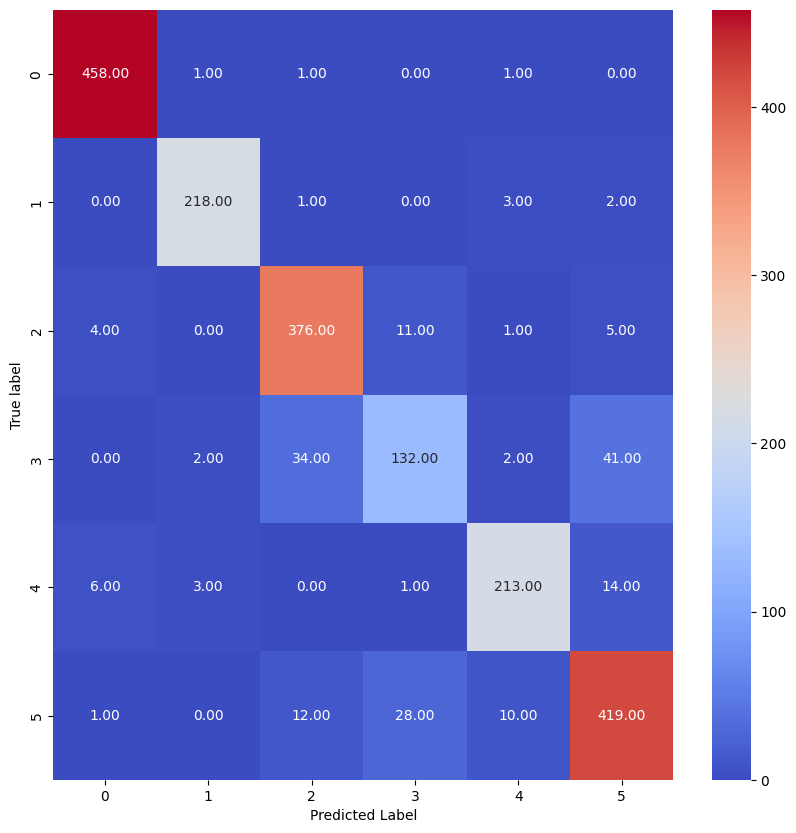

In [37]:
#Create a Confusion Matrix
plot_cm(y_test, y_pred)

### 8. Conclusion


In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.

The RandomForestClassifier model demonstrates a strong ability to predict land types in the dataset, achieving an overall accuracy of 91%. The precision, recall, and F1 scores are generally high across most land types, showing a strong ability to tell the difference between the various classes.

<br>

Performance by Class:
* Classes 1, 2, and 3:  The classes have particularly high precision and recall scores, all close to or above 90%, indicating that the model is reliable for predicting these land types accurately.

<br>

* Classes 4 and 5: The model struggles a bit more with classes 4 and 5.
 4 especially with a recall of only 63%. This lower recall shows that some instances of land type 4 are misclassified as other classes, shown by the confusion matrix.

<br>

* Balanced Performance Across classes: The weighted average F1 score of 91% shows that the model maintains a trade-off between precision and recall across all classes.

<br>

* Overall Suitability: The RandomForest model works very well for predicting land types. However, the lower performance on certain classes like 4 shows that the model needs improvement for some of the classes.

<br>

This model provides reliable and strong performance for most land types and could be used for accuarate land type prediction. For applications where determining less distinct land types like class 4 is imperative, further optimization may be required.


# Problem 2

### 1. Acquire Data

Load the landsat_train.csv into a data frame named landsat_train and the landsat_test.csv into a dataframe named landsat_test.

In [38]:
#Landsat_train
landsat_train = pd.read_csv('/content/gdrive/MyDrive/School/Machine Learning/MLA5_JCF/landsat_train.csv')
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [39]:
#Landsat_test
landsat_test = pd.read_csv('/content/gdrive/MyDrive/School/Machine Learning/MLA5_JCF/landsat_test.csv')
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


### 2. Statistical and Visual Exploration

Create bar plots to display the number of land types for landsat_train and landsat_test (two different plots).

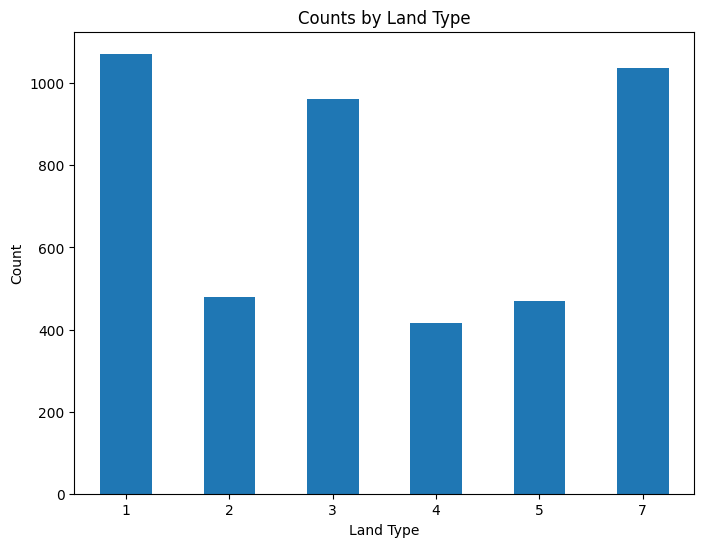

In [40]:
#Create barplots to display number of land types for train
train_land_type_counts = landsat_train['land_type'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
train_land_type_counts.plot(kind='bar')

# Rotate x-axis labels and add labels if needed
plt.xticks(rotation=0)  # Set rotation to 0 for horizontal labels
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.title('Counts by Land Type')

plt.show()

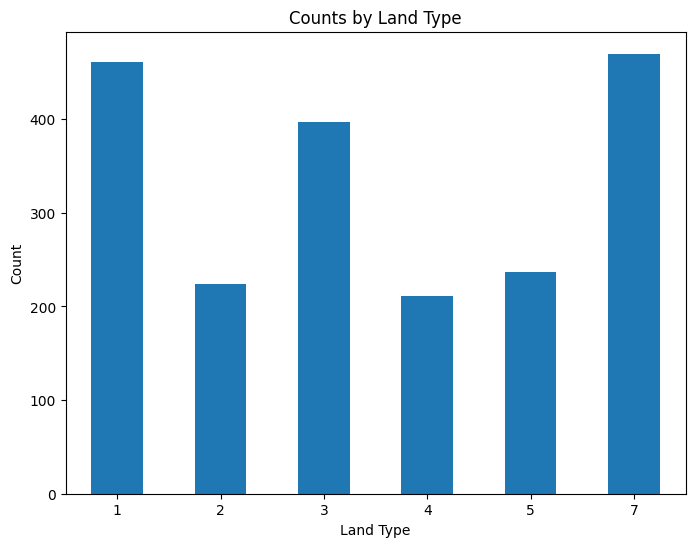

In [41]:
#Create barplot to display number of land types for test
test_land_type_counts = landsat_test['land_type'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
test_land_type_counts.plot(kind='bar')

# Rotate x-axis labels and add labels if needed
plt.xticks(rotation=0)  # Set rotation to 0 for horizontal labels
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.title('Counts by Land Type')

plt.show()

### 3. Splitting Data into Train/Test

Create a data frame called X_train with all columns from landsat_train except for land_type.

In [42]:
#Create data called X_train
X_train = landsat_train.drop('land_type', axis=1)
X_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


Create a data frame called X_test with all columns from landsat_test except for land_type.

In [43]:
#Create data ca;;ed X_test
X_test = landsat_test.drop('land_type', axis=1)
X_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,80,102,102,79,76,102,102,79,76,102,...,109,87,79,107,109,87,79,107,113,87
1,76,102,102,79,76,102,106,83,76,102,...,109,87,79,107,113,87,79,103,104,83
2,80,98,106,79,76,94,102,76,76,94,...,104,79,79,95,100,79,79,95,96,75
3,76,94,102,76,76,94,102,76,76,94,...,100,79,79,95,96,75,79,95,100,75
4,76,94,102,76,76,94,102,76,76,89,...,96,75,79,95,100,75,75,95,100,79


Create a data frame called y_train with the land_type column from landsat_train.


In [44]:
#Create y_train
y_train = landsat_train['land_type']
y_train.head()

,land_type
0,3
1,3
2,3
3,3
4,3


Create a data frame called y_test with the land_type column from landsat_test.

In [45]:
#Create y_test
y_test = landsat_test['land_type']
y_test.head()

,land_type
0,3
1,3
2,4
3,4
4,4


### 4. Building the Pipeline

Create a column transformer that will MinMax scale the numerical variables


In [46]:
#Create column transformer
numerical_features = X_train.select_dtypes(include=['number']).columns

preprocessor= ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])

Create a pipeline that will transform the data and then run the Boosting Classifier algorithm.

In [53]:
#Create a pipeline and perform Boosting Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators = 1000, random_state = 42))
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 AdaBoostClassifier(n_estimators=1000, random_state=42))])

### 5. Executing the Model

Run the pipeline to fit the Boosting Classifier model.

In [54]:
#Fit the model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 AdaBoostClassifier(n_estimators=1000, random_state=42))])

### 6. Evaluating The Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.


In [55]:
#Predict y values
y_pred = pipeline.predict(X_test)
y_pred

array([4, 4, 4, ..., 2, 2, 2])

Use the classification_function to display the precision, recall, and F1 score for each class.


In [56]:
#Create a Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.59      0.58       461
           2       0.15      0.51      0.23       224
           3       0.00      0.00      0.00       397
           4       0.28      0.80      0.42       211
           5       0.26      0.04      0.07       237
           7       0.76      0.19      0.31       470

    accuracy                           0.33      2000
   macro avg       0.34      0.36      0.27      2000
weighted avg       0.39      0.33      0.28      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.

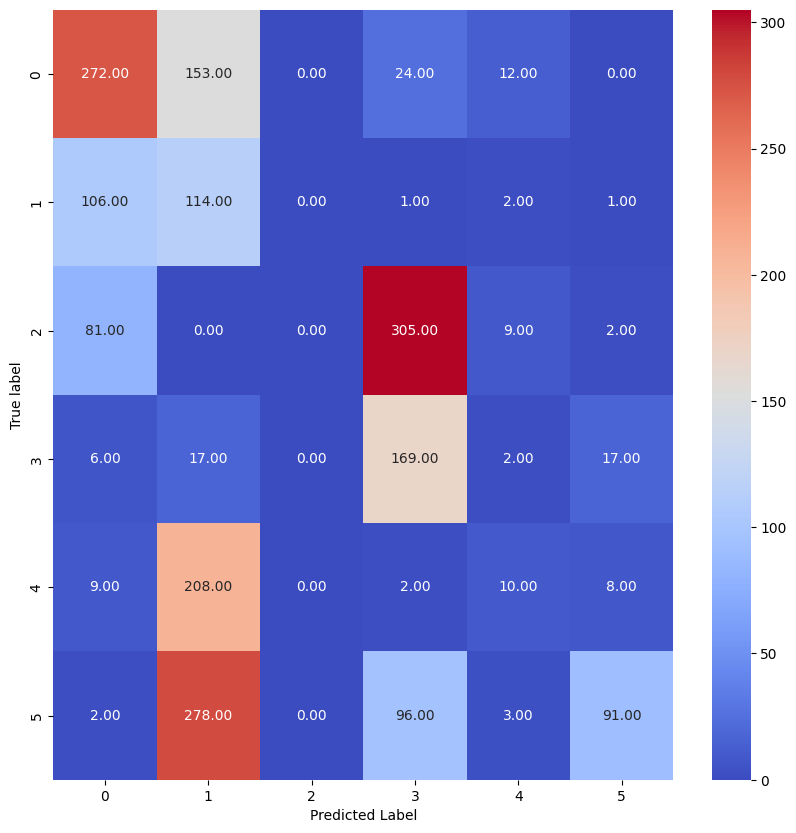

In [57]:
#Create a Confusion Matrix
plot_cm(y_test, y_pred)

### 8. Conclusion


In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.

The AdaBoostClassifier with 1000 estimators showed little effectiveness for predicting land types in this dataset. Despite having a high number of estimators, the model had an accuracy of only 33%. The low precision, recall, and F1-scores across several classes show that the model has difficulty to strongly classify different land types.

<br>

Performance:

* Class 1: With a precision of 0.57 and recall of 0.59, the model shows moderate success in identifying this class, but its performance is still limited.

<br>

* Class 2 and 7: These classes have moderate recall but low precision, showing that the model identifies some instances but has difficulty determining them from other classes.

<br>

* Class 3 and 5: Both classes show very low precision and recall, with class 3 having almost no correct predictions. This suggests the model is poor at identifying these classes.

<br>

* Class 4: The model has high recall of 0.80 for this class, meaning it captures most instances of class 4. The low precision of 0.28 shows that the model often misclassifies other classes as class 4, resulting in a high false positive rate.

<br>

* Effectiveness of Using 1000 Estimators: Using an increased number of estimators generally enhances model performance by improving strength. The high number of estimators did not perform with the expected improvement. The constant low scores show that the model had issues with determining the class characteristics in the data.

<br>

Possible Reasons for Poor Performance:

<br>

* Data Complexity and Overlapping Classes: The datasets likely have overlapping or complex class boundaries that AdaBoost has difficulty showing.

<br>

* Feature Characteristics: The confusion matrix shows frequent misclassifications, suggesting that the similar features between the classes are causing issues with predictions.

<br>

* Limitations of AdaBoost for Multi Class Tasks: AdaBoost is not always effective for multi class classification, as it can have problems with distingushing between some class boundaries.

<br>

Recommendations for Improvement:

<br>

* Experiment with Hyperparameters: Consider changing other hyperparameters, such as the learning rate and maximum depth of base estimators, to improve the model's performance.

<br>

* Try Different Models: Because of the model’s poor performance, other models should be considered.  The models could perform better for multi class characteristics and could give better accuracy and generalization.

<br>

Despite starting with a high number of estimators, the AdaBoostClassifier was a poor fit for the land type classifications. The low accuracy, with poor class separation for several categories, shows that the model does not work for reliable predictions. A more complex model, such as Gradient Boosting, may be necessary to improve performance for this dataset.


# Problem 3

### 1. Acquire Data

Load the banknote_authentication.csv into a data frame named banknote_authentication.

In [58]:
#Create a dataset called banknote_authentication
banknote_authentication = pd.read_csv('/content/gdrive/MyDrive/School/Machine Learning/MLA5_JCF/banknote_authentication.csv')
banknote_authentication.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### 2. Statistical and Visual Exploration

Create bar plots (two different plots).

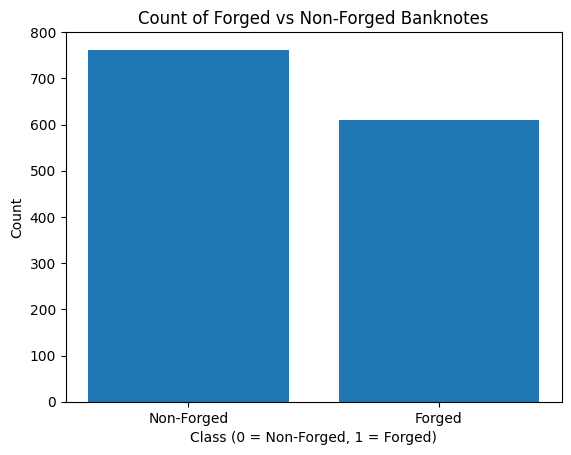

In [62]:
#Create a bar plot for the number of forgeries
class_counts = banknote_authentication['forgery'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.title("Count of Forged vs Non-Forged Banknotes")
plt.xlabel("Class (0 = Non-Forged, 1 = Forged)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Forged', 'Forged'])
plt.show()

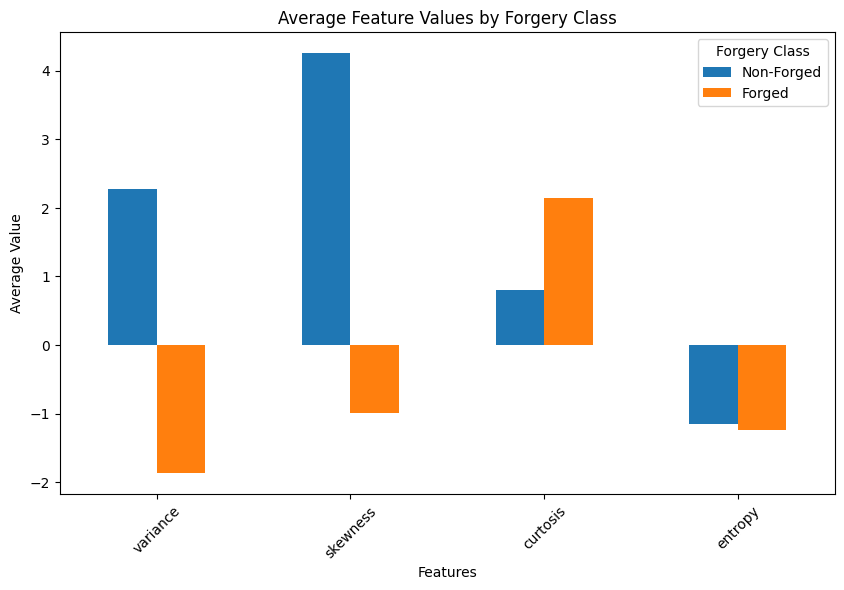

In [63]:
#Create a bar plot for the mean of each feature by forgery or non-forgery
feature_means = banknote_authentication.groupby('forgery').mean()

# Plotting the average values of each feature for non-forged and forged banknotes
feature_means.T.plot(kind='bar', figsize=(10, 6))
plt.title("Average Feature Values by Forgery Class")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(["Non-Forged", "Forged"], title="Forgery Class")
plt.show()

### 3. Splitting Data into Train/Test

Create a data frame called X

In [66]:
#Create a dataframe called X
X = banknote_authentication.drop('forgery', axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


Create a data frame called y

In [67]:
#Create a dataframe called y
y = banknote_authentication['forgery']
y.head()

,forgery
0,0
1,0
2,0
3,0
4,0


Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test

In [68]:
#Split the data and uses a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Display the shape of the DataFrame
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1097, 4)
X_test shape: (275, 4)
y_train shape: (1097,)
y_test shape: (275,)


### 4. Building the Pipeline

Create a column transformer that will MinMax scale the numerical variables


In [69]:
#Column transformer for numerical variables
numerical_features = X_train.select_dtypes(include=['number']).columns

preprocessor= ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])

Create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.

In [70]:
#Create a pipeline that runs Random Forest Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### 5. Executing the Model

Run the pipeline to fit the RandomForestClassification model.

In [71]:
#Run the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### 6. Evaluating The Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.


In [72]:
#Run the pipeline to predict y from the dataset and save them in y_pred
y_pred = pipeline.predict(X_test)

#Display the first 5 predictions
y_pred[:5]

array([0, 0, 0, 0, 0])

Use the classification_function to display the precision, recall, and F1 score for each class.


In [73]:
#Create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.

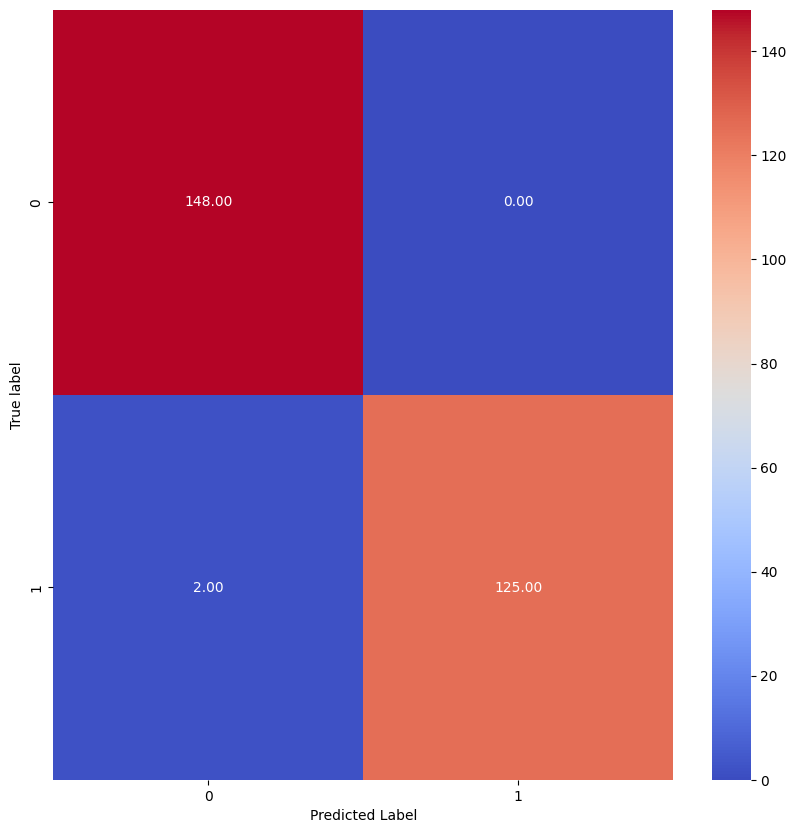

In [74]:
#Create a Confusion Matrix
plot_cm(y_test, y_pred)

### 8. Conclusion


In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.

The RandomForest model shows great performance for predicting banknote forgery shown by an overall accuracy of 99%. The classification report indicates that both precision and recall scores for the two classes are almost perfect, each achieving values close to or at 1.0.

<br>

* Precision: The model is highly accurate in its positive predictions. When the model predicts that a banknote is forged, it is correct nearly 100% of the time, reducing the likelihood of false positives.

<br>

* Recall: The model can identify actual forgeries well. With a recall of 0.98 for the forged class, it can detect nearly all instances of forgery, with only two false negatives out of 127 actual forgeries.
The confusion matrix supports this, showing only two misclassifications across 275 tests.

<br>

True Negatives at 148 and True Positives at 125 shows that the model can correctly choose between non-forged and forged banknotes.  The low misclassification rate shows the model’s ability to perform with the dataset.

<br>

Given these results, the model is highly useful for applications needing reliable indication of forgeries. Its high accuracy and equal precision and recall scores indicate minimal risk of both false positives and false negatives. This performance shows that the model could be reliably used in real world scenarios, such as automated systems for verifying currency authenticity, where both accuracy and reliability are necessary.